**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**Loading Datset **

In [2]:
# Load the dataset
df = pd.read_csv("DatasetLinns.csv")
# Display the first few rows of the dataset
df.head()

,ID,Product,Price ($),Value for Money,Year of Launch,Total Users (millions),Total Sales (millions),Best Seller Country,Best in Tech,Practical Use Case
0,1,Apple AirTag,20.93,1.5,2019,78,42,Poland,Yes,Securing school bags
1,2,Apple AirTag,38.98,1.3,2019,25,34,Kenya,No,Tracking bags
2,3,Apple AirTag,26.09,3.9,2019,79,63,Taiwan,No,Tracking equipment
3,4,Apple AirTag,25.18,4.1,2019,76,30,Egypt,No,Tracking bags
4,5,Apple AirTag,26.23,3.1,2019,29,29,South Korea,No,Finding keys


**Visualising the dataset**

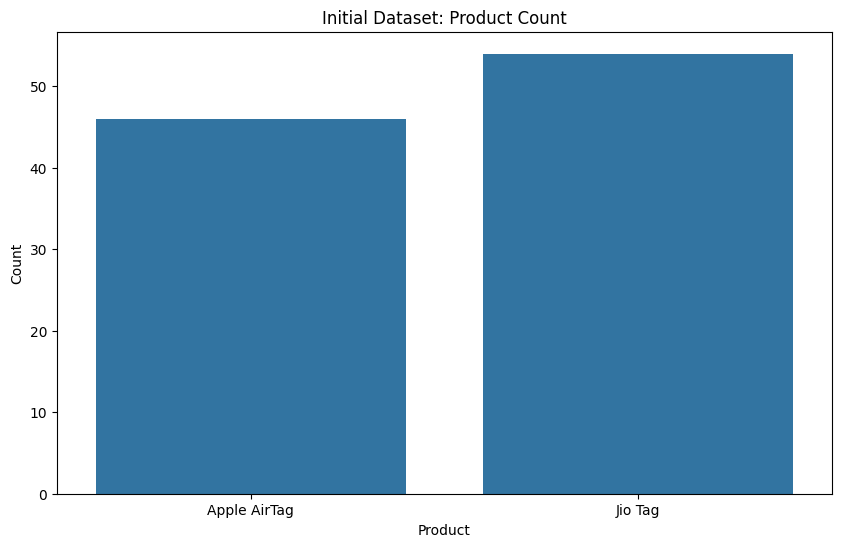

In [4]:
#visualize dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product')
plt.title('Initial Dataset: Product Count')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

***Preprocessing***

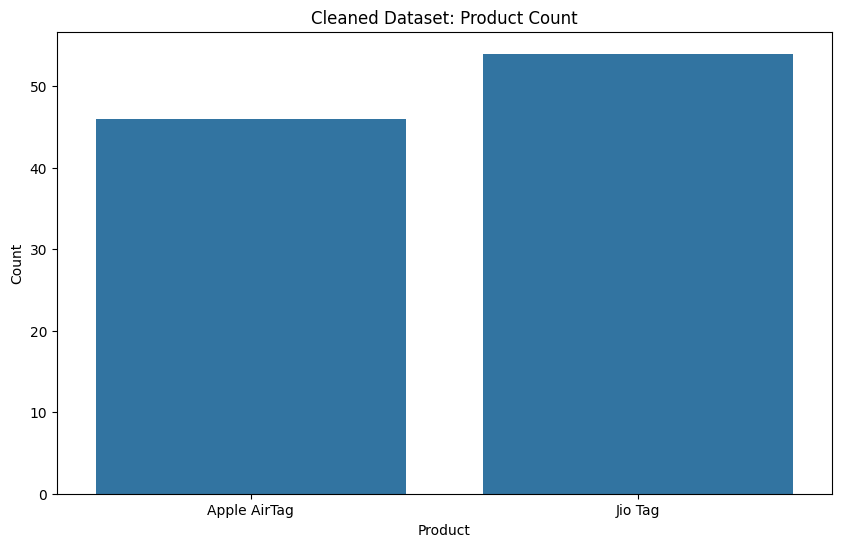

In [5]:
#  Remove duplicate rows and visualize the cleaned dataset
df_cleaned = df.drop_duplicates()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Product')
plt.title('Cleaned Dataset: Product Count')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

** Generate Hypothetical Actual and Predicted Values for Demonstration**

In [10]:
#Generate hypothetical actual and predicted values for demonstration
np.random.seed(42)  # For reproducibility
df_cleaned['Actual'] = np.random.choice([0, 1], size=len(df_cleaned))  # Actual values (0 or 1)
df_cleaned['Predicted'] = np.random.choice([0, 1], size=len(df_cleaned))  # Predicted values (0 or 1)


 **Prepare Features and Target, Train Logistic Regression Model, and Visualize Distribution**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


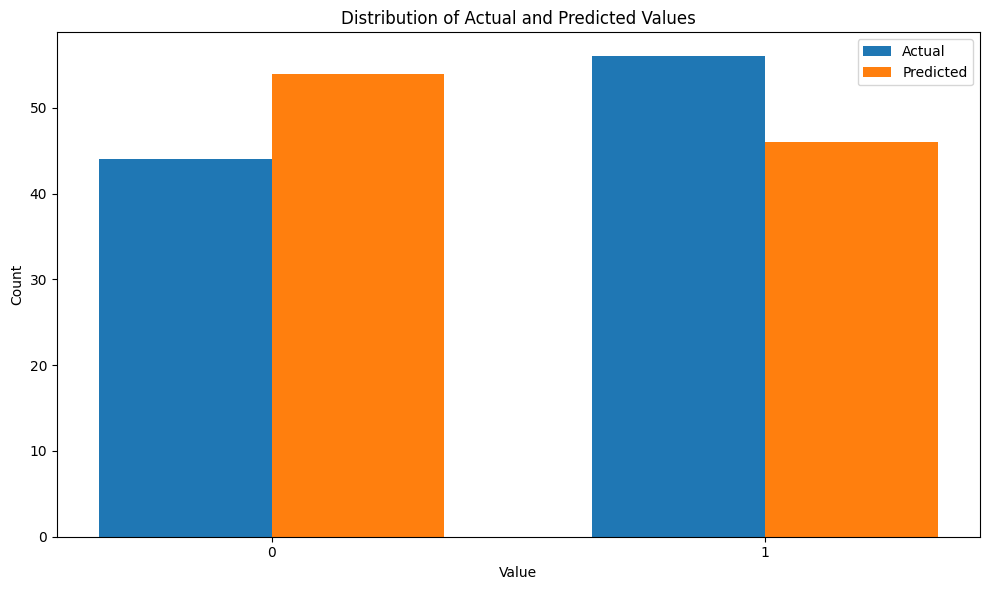

In [11]:
# Prepare the features and target
X = df_cleaned.drop(columns=['Actual', 'Predicted'], errors='ignore')
y = df_cleaned['Actual']

# Convert categorical columns to numerical
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Append predictions to the cleaned DataFrame
df_cleaned.loc[y_test.index, 'Predicted'] = y_pred

# Visualize the distribution of Actual and Predicted values together
plt.figure(figsize=(10, 6))

# Subplot 1: Distribution of Actual and Predicted values side by side
bar_width = 0.35
index = np.arange(2)

actual_counts = df_cleaned['Actual'].value_counts().sort_index()
predicted_counts = df_cleaned['Predicted'].value_counts().sort_index()

plt.bar(index, actual_counts, bar_width, label='Actual')
plt.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Actual and Predicted Values')
plt.xticks(index + bar_width / 2, ('0', '1'))
plt.legend()

plt.tight_layout()
plt.show()


**Accuracy**

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.55


In [13]:
# Save the cleaned dataset
cleaned_csv_file_path = "datasetLinn.csv"
df_cleaned.to_csv(cleaned_csv_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_csv_file_path}")

Cleaned dataset saved to datasetLinn.csv
